In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Apr 15 13:31:51 2020

@author: vallon2
"""

import matplotlib.pyplot as plt
import numpy as np
import pyomo.environ as pyo

Horizon = 48
T = np.array([t for t in range(0, Horizon)])
d = np.array([100 + 50*np.sin(t*2*np.pi/24) for t in T])

N = 3
N = np.array([n for n in range(0, N)])

pmax = [100, 50, 25]
pmin = [20, 40, 1]
Q = [0.04, 0.01, 0.02]
C = [10, 20, 20]

Using license file C:\Users\frbor\gurobi.lic
Academic license - for non-commercial use only
# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 70257.53537648752
  Upper bound: 70257.53537648749
  Number of objectives: 1
  Number of constraints: 480
  Number of variables: 288
  Number of binary variables: 144
  Number of integer variables: 144
  Number of continuous variables: 0
  Number of nonzeros: 864
  Sense: 1
  Number of solutions: 2
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Name: Gurobi 9.02
  Status: ok
  Wallclock time: 0.013835906982421875
  Terminatio

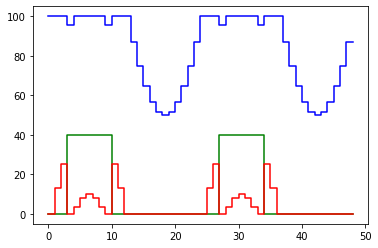

In [4]:
m = pyo.ConcreteModel()
m.N = pyo.Set(initialize=N)
m.T = pyo.Set(initialize=T)

m.x = pyo.Var(m.N, m.T, bounds = (0, max(pmax)))
def xConstr(m,n,t):
    return m.x[n,t]<=pmax[n]
m.x_constr = pyo.Constraint(m.N, m.T, rule=xConstr)

m.u = pyo.Var(m.N, m.T, domain=pyo.Binary)

# objective
m.cost = pyo.Objective(expr = sum(m.x[n,t]*m.x[n,t]*Q[n] + m.x[n,t]*C[n] for t in m.T for n in m.N), sense=pyo.minimize)

# demand
m.demand = pyo.Constraint(m.T, rule=lambda m, t: sum(m.x[n,t] for n in N) >= d[t])

# constraints
m.lb = pyo.Constraint(m.N, m.T, rule=lambda m, n, t: pmin[n]*m.u[n,t] <= m.x[n,t])
m.ub = pyo.Constraint(m.N, m.T, rule=lambda m, n, t: pmax[n]*m.u[n,t] >= m.x[n,t])
   
# solve
pyo.SolverFactory('gurobi', solver_io='python').solve(m).write()

# plot results
Unit1=[pyo.value(m.x[0,0])]
Unit2 = [pyo.value(m.x[1,0])]
Unit3 = [pyo.value(m.x[2,0])]
for t in T:
    Unit1.append(pyo.value(m.x[0,t]))
    Unit2.append(pyo.value(m.x[1,t]))
    Unit3.append(pyo.value(m.x[2,t]))
plt.figure()
plt.step(Unit1,'b')
plt.step(Unit2,'g')
plt.step(Unit3,'r')
plt.show()